In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
df = pd.read_csv("/kaggle/input/nhanes-obesity-data/Obesity_DataSet_2.csv")

In [57]:
df.head()

,BMI_WHO,Age,Gender,Race1,Education,HHIncome,PhysActive,Smoke100,Diabetes,BPSysAve,TotChol,Alcohol12PlusYr,MaritalStatus,Work,Height,Depressed
0,Obese,34,male,White,High School,25000-34999,No,Yes,No,113.0,3.49,Yes,Married,NotWorking,164.7,Several
1,Obese,34,male,White,High School,25000-34999,No,Yes,No,113.0,3.49,Yes,Married,NotWorking,164.7,Several
2,Obese,34,male,White,High School,25000-34999,No,Yes,No,113.0,3.49,Yes,Married,NotWorking,164.7,Several
3,Obese,49,female,White,Some College,35000-44999,No,Yes,No,112.0,6.70,Yes,LivePartner,NotWorking,168.4,Several
4,OverWeight,45,female,White,College Grad,75000-99999,Yes,No,No,118.0,5.82,Yes,Married,Working,166.7,NaN


In [58]:
df.columns

Index(['BMI_WHO', 'Age', 'Gender', 'Race1', 'Education', 'HHIncome',
       'PhysActive', 'Smoke100', 'Diabetes', 'BPSysAve', 'TotChol',
       'Alcohol12PlusYr', 'MaritalStatus', 'Work', 'Height', 'Depressed'],
      dtype='object')

In [59]:
df.shape

(7481, 16)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7481 entries, 0 to 7480
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BMI_WHO          7384 non-null   object 
 1   Age              7481 non-null   int64  
 2   Gender           7481 non-null   object 
 3   Race1            7481 non-null   object 
 4   Education        7221 non-null   object 
 5   HHIncome         6838 non-null   object 
 6   PhysActive       7481 non-null   object 
 7   Smoke100         7235 non-null   object 
 8   Diabetes         7479 non-null   object 
 9   BPSysAve         7205 non-null   float64
 10  TotChol          7076 non-null   float64
 11  Alcohol12PlusYr  6580 non-null   object 
 12  MaritalStatus    7231 non-null   object 
 13  Work             7480 non-null   object 
 14  Height           7424 non-null   float64
 15  Depressed        1427 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 935.3+ KB


In [61]:
df.describe()

,Age,BPSysAve,TotChol,Height
count,7481.000000,7205.000000,7076.000000,7424.000000
mean,46.230317,120.727412,5.043180,168.862958
std,17.432238,17.062337,1.063088,10.105835
min,18.000000,78.000000,1.530000,134.500000
25%,31.000000,109.000000,4.270000,161.500000
50%,45.000000,118.000000,4.970000,168.800000
75%,59.000000,129.000000,5.690000,176.125000
max,80.000000,226.000000,13.650000,200.400000


In [62]:
df.isnull().sum()

BMI_WHO              97
Age                   0
Gender                0
Race1                 0
Education           260
HHIncome            643
PhysActive            0
Smoke100            246
Diabetes              2
BPSysAve            276
TotChol             405
Alcohol12PlusYr     901
MaritalStatus       250
Work                  1
Height               57
Depressed          6054
dtype: int64

In [63]:
df[df.duplicated()]

,BMI_WHO,Age,Gender,Race1,Education,HHIncome,PhysActive,Smoke100,Diabetes,BPSysAve,TotChol,Alcohol12PlusYr,MaritalStatus,Work,Height,Depressed
1,Obese,34,male,White,High School,25000-34999,No,Yes,No,113.0,3.49,Yes,Married,NotWorking,164.7,Several
2,Obese,34,male,White,High School,25000-34999,No,Yes,No,113.0,3.49,Yes,Married,NotWorking,164.7,Several
5,OverWeight,45,female,White,College Grad,75000-99999,Yes,No,No,118.0,5.82,Yes,Married,Working,166.7,NaN
6,OverWeight,45,female,White,College Grad,75000-99999,Yes,No,No,118.0,5.82,Yes,Married,Working,166.7,NaN
15,NormWeight,56,female,White,College Grad,75000-99999,Yes,No,No,95.0,5.79,Yes,Married,NotWorking,170.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,NormWeight,80,male,White,High School,55000-64999,Yes,No,No,148.0,4.37,Yes,Married,NotWorking,175.4,NaN
7474,Obese,66,female,White,College Grad,65000-74999,No,No,No,114.0,6.47,No,Widowed,Working,159.0,NaN
7476,OverWeight,28,male,Mexican,9 - 11th Grade,5000-9999,Yes,Yes,No,124.0,3.90,NaN,NeverMarried,Working,177.3,NaN
7477,OverWeight,28,male,Mexican,9 - 11th Grade,5000-9999,Yes,Yes,No,124.0,3.90,NaN,NeverMarried,Working,177.3,NaN


DATA CLEANING 

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.shape

(4835, 16)

In [66]:
df.dropna(subset=["BMI_WHO"], inplace=True)

In [67]:
df

,BMI_WHO,Age,Gender,Race1,Education,HHIncome,PhysActive,Smoke100,Diabetes,BPSysAve,TotChol,Alcohol12PlusYr,MaritalStatus,Work,Height,Depressed
0,Obese,34,male,White,High School,25000-34999,No,Yes,No,113.0,3.49,Yes,Married,NotWorking,164.7,Several
3,Obese,49,female,White,Some College,35000-44999,No,Yes,No,112.0,6.70,Yes,LivePartner,NotWorking,168.4,Several
4,OverWeight,45,female,White,College Grad,75000-99999,Yes,No,No,118.0,5.82,Yes,Married,Working,166.7,NaN
7,NormWeight,66,male,White,Some College,25000-34999,Yes,Yes,No,111.0,4.99,Yes,Married,NotWorking,169.5,NaN
8,NormWeight,58,male,White,College Grad,more 99999,Yes,No,No,104.0,4.24,Yes,Divorced,Working,181.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,NormWeight,80,male,White,High School,55000-64999,Yes,No,No,148.0,4.37,Yes,Married,NotWorking,175.4,NaN
7473,Obese,66,female,White,College Grad,65000-74999,No,No,No,114.0,6.47,No,Widowed,Working,159.0,NaN
7475,OverWeight,28,male,Mexican,9 - 11th Grade,5000-9999,Yes,Yes,No,124.0,3.90,NaN,NeverMarried,Working,177.3,NaN
7478,Obese,27,male,Mexican,College Grad,75000-99999,No,No,No,133.0,5.72,Yes,Married,Working,175.8,NaN


In [68]:
#Filling numerical columns with mean values
df["BPSysAve"] = df["BPSysAve"].fillna(value=df["BPSysAve"].mean())

df["TotChol"] = df["TotChol"].fillna(value=df["BPSysAve"].mean())

df["Height"] = df["Height"].fillna(value=df["Height"].mean())

In [69]:
#Filling categorical columns with mode values
df["Education"] = df["Education"].fillna(value=df["Education"].mode()[0])

df["HHIncome"] = df["HHIncome"].fillna(value=df["HHIncome"].mode()[0])

df["Smoke100"] = df["Smoke100"].fillna(value=df["Smoke100"].mode()[0])

df["Diabetes"] = df["Diabetes"].fillna(value=df["Diabetes"].mode()[0])

df["Alcohol12PlusYr"] = df["Alcohol12PlusYr"].fillna(value=df["Alcohol12PlusYr"].mode()[0])

df["MaritalStatus"] = df["MaritalStatus"].fillna(value=df["MaritalStatus"].mode()[0])

df["Work"] = df["Work"].fillna(value=df["Work"].mode()[0])

df["Depressed"] = df["Depressed"].fillna(value=df["Depressed"].mode()[0])

In [70]:
df.isna().sum()

BMI_WHO            0
Age                0
Gender             0
Race1              0
Education          0
HHIncome           0
PhysActive         0
Smoke100           0
Diabetes           0
BPSysAve           0
TotChol            0
Alcohol12PlusYr    0
MaritalStatus      0
Work               0
Height             0
Depressed          0
dtype: int64

EXPLORATORY DATA ANALYSIS

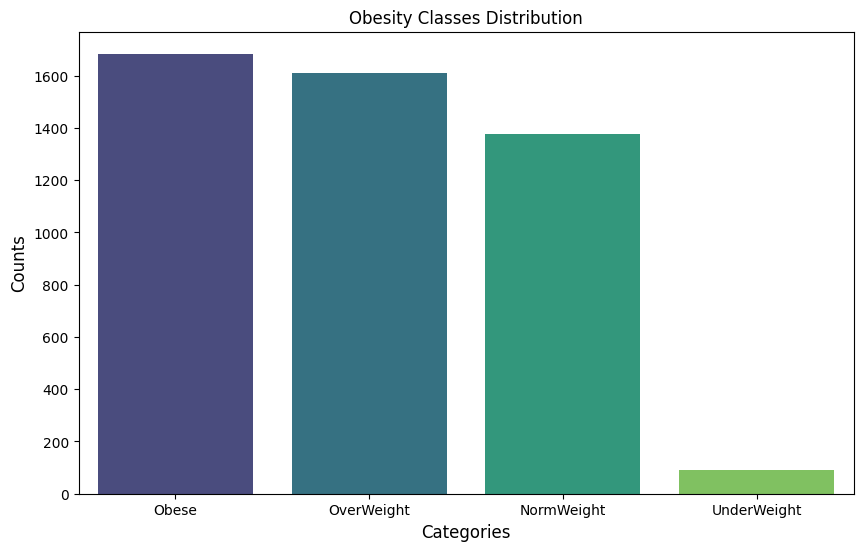

In [71]:
#Obesity classifications
plt.figure(figsize=(10,6))

ax = sns.countplot(
    data = df,
    x = "BMI_WHO",
    order = df["BMI_WHO"].value_counts().index,
    palette = "viridis"
)

plt.title("Obesity Classes Distribution")
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Counts", fontsize=12)

plt.show()

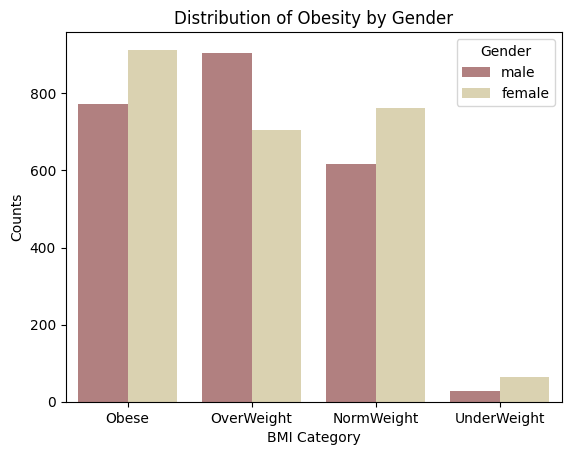

In [72]:
#Gender and obesity 
plt.figsize=(10,6)

sns.countplot(
    x="BMI_WHO",
    data = df,
    hue = "Gender",
    order = df["BMI_WHO"].value_counts().index,
    palette = "pink"
)

plt.title("Distribution of Obesity by Gender")
plt.xlabel("BMI Category")
plt.ylabel("Counts")
plt.legend(title="Gender")
plt.show()

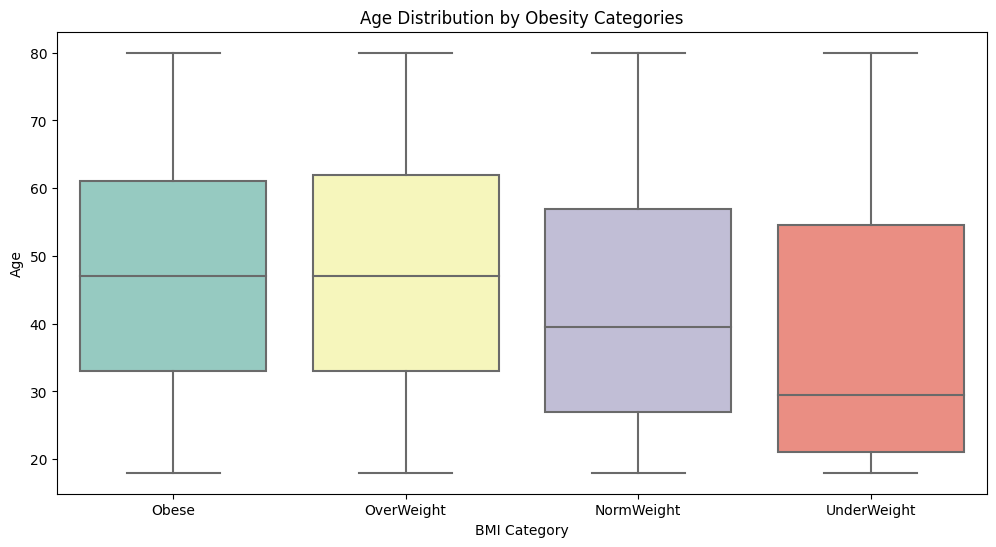

In [73]:
#Age and Obesity 
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x="BMI_WHO",
    y="Age",
    order = df["BMI_WHO"].value_counts().index,
    palette="Set3"
)

plt.title("Age Distribution by Obesity Categories")
plt.xlabel("BMI Category")
plt.ylabel("Age")
plt.show()

FEATURE ENGINEERING

In [74]:
binary_map = {
    "UnderWeight": 0,
    "NormWeight": 0,
    "OverWeight": 0,
    "Obese": 1
}

df["BMI_WHO"] = df["BMI_WHO"].astype(str).str.strip()
df["BMI_WHO"] = df["BMI_WHO"].map(binary_map)
df.dropna(subset=["BMI_WHO"], inplace=True)


le = LabelEncoder()

cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [75]:
df.head()

,BMI_WHO,Age,Gender,Race1,Education,HHIncome,PhysActive,Smoke100,Diabetes,BPSysAve,TotChol,Alcohol12PlusYr,MaritalStatus,Work,Height,Depressed
0,1,34,1,4,3,5,0,1,0,113.0,3.49,1,2,1,164.7,1
3,1,49,0,4,4,6,0,1,0,112.0,6.70,1,1,1,168.4,1
4,0,45,0,4,2,10,1,0,0,118.0,5.82,1,2,2,166.7,1
7,0,66,1,4,4,5,1,1,0,111.0,4.99,1,2,1,169.5,1
8,0,58,1,4,2,11,1,0,0,104.0,4.24,1,0,2,181.9,1


In [76]:
y = df["BMI_WHO"]
X = df.drop("BMI_WHO", axis=1)

print("Shape of x", X.shape)
print("Shape of y", y.shape)

Shape of x (4762, 15)
Shape of y (4762,)


In [77]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

#Scaling
scaler = StandardScaler()

cols_to_scale = ["Age", "BPSysAve", "TotChol", "Height"]

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#Result
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 3809
X_test: 953


Model is training...

Accuracy of the model: %65.79 
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       616
           1       0.54      0.24      0.33       337

    accuracy                           0.66       953
   macro avg       0.61      0.56      0.55       953
weighted avg       0.63      0.66      0.61       953



Text(70.72222222222221, 0.5, 'Actual Values')

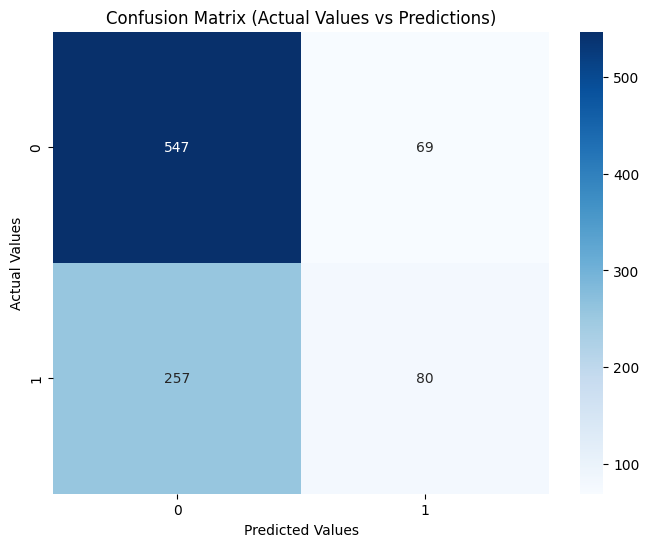

In [78]:
#Training and Prediction

model = RandomForestClassifier(n_estimators=100, random_state=42)

#Training
print("Model is training...")
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: %{accuracy *100:.2f} ")

#Detailed Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Actual Values vs Predictions)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")